Online Tutorials:
- https://towardsdatascience.com/q-learning-algorithm-from-explanation-to-implementation-cdbeda2ea187
- https://gymnasium.farama.org/environments/toy_text/frozen_lake/
- https://towardsdatascience.com/q-learning-for-beginners-2837b777741

In [26]:
# Import modules
import numpy as np
import gymnasium as gym
import matplotlib.pyplot as plt
from IPython import display as ipythondisplay
from stable_baselines3 import DQN, PPO, A2C, DDPG, TD3, SAC

In [2]:
# Initialize the FrozenLake environment
env = gym.make(
    # Specify the name of the environment
    'FrozenLake-v1',

    # Specify a custom map for the environment
    desc=["SFFF", "FHFH", "FFFH", "HFFG"],

    # Specify the desired map size
    map_name="4x4", 

    # Specify if the environment is slippery.
    # If true the player will move in intended direction with probability of 1/3; 
    # else will move in either perpendicular direction with equal probability of 1/3 in both directions.
    is_slippery=False,
    
    # Set the render mode
    render_mode="rgb_array"
    )

In [3]:
# Get the number of observations and actions
n_observations = env.observation_space.n
n_actions = env.action_space.n
print("Number of observations:", n_observations)
print("Number of actions:", n_actions)

Number of observations: 16
Number of actions: 4


In [7]:
# Function to display the environment's state as an image
def show_state(state_img):
    # Set the figure size
    plt.figure(figsize=(5, 5))

    # Display the image
    plt.imshow(state_img)

    # Remove the axis
    plt.axis('off')

    # Clear the previous image
    ipythondisplay.clear_output(wait=True)

    # Display the current image
    ipythondisplay.display(plt.gcf())

    # Prevents duplicate display of the last image
    plt.close()

In [36]:
# Sample a random action
action = env.action_space.sample()
print('random action: ', action)

random action:  3


In [37]:
# Reset the environment
current_state, _ = env.reset()
print("Current state:", current_state)

Current state: 0


In [38]:
# Take a look at the output of the step function
next_state, reward, done, _, probs = env.step(action)
print('next state: ', next_state)
print('reward: ', reward)
print('done?: ', done)
print('probs: ', probs)

next state:  0
reward:  0.0
done?:  False
probs:  {'prob': 1.0}


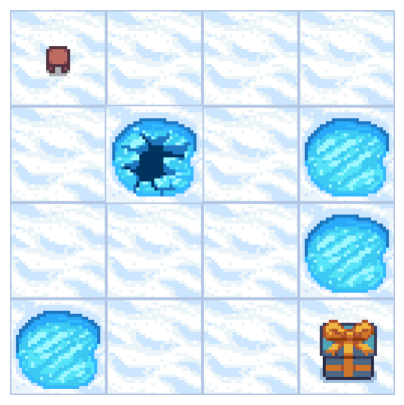

Episode 1: Total reward: 0.0


In [40]:
# Set the number of episodes you want to run your agent for
num_evaluation_episodes = 1

# Randomly select an action to play the game
for episode in range(num_evaluation_episodes):
    current_state, _ = env.reset()
    done = False
    total_episode_reward = 0

    while not done:
        # Choose the best action based on the Q-table
        action = env.action_space.sample()

        # Perform the action in the environment
        next_state, reward, done, _, _ = env.step(action)
        total_episode_reward += reward

        # Render the environment and display the frame
        state_img = env.render()
        show_state(state_img)

        # Update the current state to the next state
        current_state = next_state

        # Pause a bit so we can see the visualization
        # You can adjust the pause time as needed
        plt.pause(1)

    print(f"Episode {episode+1}: Total reward: {total_episode_reward}")

# Close the environment when done
env.close()

In [41]:
# Initialize the Q-table to 0 (state/observation x action matrix)
Q_table = np.zeros((n_observations, n_actions))
print(Q_table)

[[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]


In [44]:
## Define the parameters

# Number of episode we will run
n_episodes = 10000

# Maximum of iteration per episode
max_iter_episode = 100

# Initialize the exploration probability to 1
exploration_proba = 1

# Exploartion decreasing decay for exponential decreasing
exploration_decreasing_decay = 0.001

# Minimum of exploration proba
min_exploration_proba = 0.01

# Discounted factor
gamma = 0.99

# Learning rate
lr = 0.1

In [45]:
# Use a list to store the rewards
lst_rewards_per_episode = []

In [46]:
# We iterate over episodes
for e in range(n_episodes):
    # We initialize the first state of the episode
    current_state, _ = env.reset()

    # We reset the done variable to be false
    done = False
    
    # Sum the rewards that the agent gets from the environment
    total_episode_reward = 0
    
    for i in range(max_iter_episode): 
        # We sample a float from a uniform distribution over 0 and 1.
        # If the sampled float is less than the exploration proba, 
        # the agent selects a random action; otherwise, 
        # it exploits its knowledge using the Bellman equation.
        if np.random.uniform(0,1) < exploration_proba:
            action = env.action_space.sample()
        else:
            action = np.argmax(Q_table[current_state,:])
        
        # The environment runs the chosen action and returns
        # the next state, a reward and true if the epiosode is ended.
        next_state, reward, done, _, _ = env.step(action)
        
        # We update our Q-table using the Q-learning iteration.
        Q_table[current_state, action] = (1 - lr) * Q_table[current_state, action] +lr * (reward + gamma * max(Q_table[next_state,:]))
        total_episode_reward = total_episode_reward + reward
        
        # If the episode is finished, we leave the for loop.
        if done:
            break
        current_state = next_state

    # We update the exploration proba using exponential decay formula.
    exploration_proba = max(min_exploration_proba, np.exp(-exploration_decreasing_decay * e))

    # We add the total episode reward to the list
    lst_rewards_per_episode.append(total_episode_reward)

In [47]:
# Print the Q-table
print(Q_table)

[[0.94148015 0.93206534 0.95099005 0.94148015]
 [0.94148015 0.         0.96059601 0.95099004]
 [0.95099005 0.970299   0.95099003 0.96059601]
 [0.96059601 0.         0.74853684 0.85309572]
 [0.8854508  0.71359576 0.         0.94148015]
 [0.         0.         0.         0.        ]
 [0.         0.9801     0.         0.96059546]
 [0.         0.         0.         0.        ]
 [0.36927732 0.         0.90377075 0.40421864]
 [0.44181865 0.59520927 0.98009991 0.        ]
 [0.97029721 0.99       0.         0.97029897]
 [0.         0.         0.         0.        ]
 [0.         0.         0.         0.        ]
 [0.         0.74174259 0.98999611 0.51786129]
 [0.98006197 0.98999888 1.         0.98009861]
 [0.         0.         0.         0.        ]]


In [49]:
# Print the mean reward per thousand episodes
print("Mean reward per thousand episodes")
for i in range(10):
    print(np.mean(lst_rewards_per_episode[1000*i:1000*(i+1)]))

Mean reward per thousand episodes
0.234
0.747
0.914
0.972
0.993
0.988
0.987
0.986
0.991
0.991


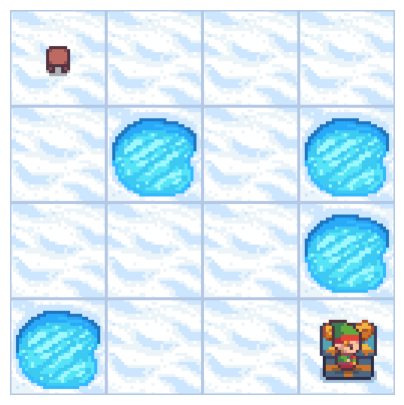

Episode 1: Total reward: 1.0


In [51]:
# Set the number of episodes you want to run your agent for
num_evaluation_episodes = 1

# Use the Q-table to play the game
for episode in range(num_evaluation_episodes):
    current_state, _ = env.reset()
    done = False
    total_episode_reward = 0

    while not done:
        # Choose the best action based on the Q-table
        action = np.argmax(Q_table[current_state])

        # Perform the action in the environment
        next_state, reward, done, _, _ = env.step(action)
        total_episode_reward += reward

        # Render the environment and display the frame
        state_img = env.render()
        show_state(state_img)

        # Update the current state to the next state
        current_state = next_state

        # Pause a bit so we can see the visualization
        # You can adjust the pause time as needed
        plt.pause(1)

    print(f"Episode {episode+1}: Total reward: {total_episode_reward}")

# Close the environment when done
env.close()


In [4]:
# Create a DQN model using the sb3 library
dqn = DQN('MlpPolicy', env, verbose=0)

In [14]:
# Train the DQN model for 1 million episodes
dqn.learn(total_timesteps=1000000, progress_bar=True)

Output()

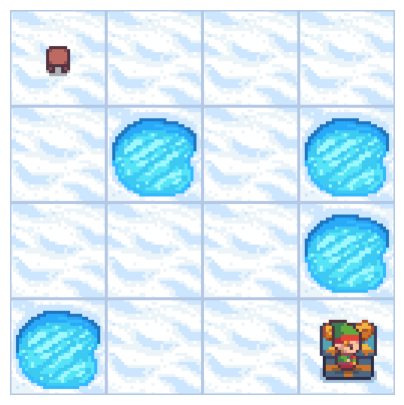

Episode 1: Total reward: 1.0


In [16]:
# Set the number of episodes you want to run your agent for
num_evaluation_episodes = 1

# Use the Q-table to play the game
for episode in range(num_evaluation_episodes):
    current_state, _ = env.reset()
    done = False
    total_episode_reward = 0

    while not done:
        # Choose the best action based on the Q-table
        action, _ = dqn.predict(current_state, deterministic=True)
        action = action.item()  # Convert numpy array or tensor to integer if necessary

        # Perform the action in the environment
        next_state, reward, done, _, _ = env.step(action)
        total_episode_reward += reward

        # Render the environment and display the frame
        state_img = env.render()
        show_state(state_img)

        # Update the current state to the next state
        current_state = next_state

        # Pause a bit so we can see the visualization
        # You can adjust the pause time as needed
        plt.pause(1)

    print(f"Episode {episode+1}: Total reward: {total_episode_reward}")

# Close the environment when done
env.close()


In [24]:
# Define a function to evaluate the RL model
def evaluate_rl_model(model, env, n_episodes=1000, max_iter_episode=100):
    """
    Evaluate a given RL model over a specified number of episodes and print the average rewards.

    Parameters:
    - model: The RL model to evaluate.
    - env: The environment on which to evaluate the model.
    - n_episodes: The number of episodes to run for evaluation.
    - max_iter_episode: The maximum number of steps per episode.
    """
    
    lst_rewards_per_episode = []  # Use a list to store the rewards for each episode

    for e in range(n_episodes):
        current_state, _ = env.reset()
        done = False
        total_episode_reward = 0

        for i in range(max_iter_episode):
            action, _ = model.predict(current_state, deterministic=True)
            # For models that do not use numpy arrays for actions, no need to convert
            if isinstance(action, np.ndarray):
                action = action.item()  # Convert numpy array to integer if necessary
            
            next_state, reward, done, _, _ = env.step(action)
            total_episode_reward += reward
            
            if done:
                break
            current_state = next_state

        lst_rewards_per_episode.append(total_episode_reward)

    # Print the mean reward per 100 episodes
    print("Mean reward per 100 episodes")
    for i in range(int(n_episodes / 100)):
        start_index = 100 * i
        end_index = min(100 * (i + 1), n_episodes)  # Ensure not to go out of bounds
        print(f"From episode {start_index} to episode {end_index}: ", 
              np.mean(lst_rewards_per_episode[start_index:end_index]))

In [25]:
# Evaluate the DQN model
evaluate_rl_model(dqn, env, n_episodes=1000, max_iter_episode=100)

Mean reward per 100 episodes
From episode 0 to episode 100:  1.0
From episode 100 to episode 200:  1.0
From episode 200 to episode 300:  1.0
From episode 300 to episode 400:  1.0
From episode 400 to episode 500:  1.0
From episode 500 to episode 600:  1.0
From episode 600 to episode 700:  1.0
From episode 700 to episode 800:  1.0
From episode 800 to episode 900:  1.0
From episode 900 to episode 1000:  1.0


In [28]:
# Create a A2C model using the sb3 library
a2c = A2C('MlpPolicy', env, verbose=0)

# Train the DQN model for 1 million episodes
a2c.learn(total_timesteps=1000000, progress_bar=True)

Output()

In [29]:
# Evaluate the A2C model
evaluate_rl_model(a2c, env, n_episodes=1000, max_iter_episode=100)

Mean reward per 100 episodes
From episode 0 to episode 100:  1.0
From episode 100 to episode 200:  1.0
From episode 200 to episode 300:  1.0
From episode 300 to episode 400:  1.0
From episode 400 to episode 500:  1.0
From episode 500 to episode 600:  1.0
From episode 600 to episode 700:  1.0
From episode 700 to episode 800:  1.0
From episode 800 to episode 900:  1.0
From episode 900 to episode 1000:  1.0
